## **SCORING - Soluble Epoxide Hydrolase**
#### **Micha Birklbauer 2021-08-05**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrophobic_Interaction:PHE387A,Hydrogen_Bond:TYR466A,Hydrogen_Bond:TRP336A,Salt_Bridge:HIS524A,Hydrophobic_Interaction:ASN472A,Hydrogen_Bond:ASN472A,Water_Bridge:ALA365A,Pi-Cation_Interaction:HIS524A,...,Water_Bridge:PHE267A,Hydrophobic_Interaction:PRO371A,Hydrophobic_Interaction:LEU428A,Hydrophobic_Interaction:ALA365A,Hydrogen_Bond:LEU408A,Hydrogen_Bond:TYR383A,Hydrogen_Bond:TYR343A,Hydrophobic_Interaction:HIS524A,Halogen_Bond:ASN472A,LABEL
0,1,IA_147.cdx|SeH_inactivess_minimized|sdf|48,1,1,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,inactive
1,2,IA_10|SeH_inactivess_minimized|sdf|1,0,1,0,1,0,0,0,0,...,2,0,0,0,0,2,0,0,0,inactive
2,3,A_103|SEH_inhibs_minimized|sdf|5,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,active
3,4,A_76|SEH_inhibs_minimized|sdf|46,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,active
4,5,IA_12|SeH_inactivess_minimized|sdf|22,0,1,0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,A_21|SEH_inhibs_minimized|sdf|20,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,active
146,147,IA_51.cdx|SeH_inactivess_minimized|sdf|136,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
147,148,IA_179.cdx|SeH_inactivess_minimized|sdf|80,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
148,149,IA_70.cdx|SeH_inactivess_minimized|sdf|148,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(150, 78) 39


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(38, 78) 8


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(48, 78) 11


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrophobic_Interaction:LEU499A,0.280665,0.641026,0.360360
1,2,Hydrophobic_Interaction:TYR383A,0.252945,0.487179,0.234234
2,3,Hydrophobic_Interaction:TRP525A,0.211365,0.589744,0.378378
3,4,Hydrophobic_Interaction:TYR466A,0.198198,0.666667,0.468468
4,5,Hydrogen_Bond:TYR383A,0.176715,0.102564,0.279279
...,...,...,...,...,...
70,71,Halogen_Bond:ASP496A,0.007623,0.025641,0.018018
71,72,Hydrogen_Bond:LEU408A,0.007623,0.025641,0.018018
72,73,Halogen_Bond:ASN472A,0.007623,0.025641,0.018018
73,74,Hydrophobic_Interaction:PHE387A,0.006237,0.051282,0.045045


#### **Extract relevant features:**

In [10]:
optimized_values = get_optimized_feature_thresholds(features, data_train)

In [11]:
for item in islice(optimized_values["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat3 Accuracy: 0.8533333333333334
Key: 0.0, 0.0, 0.0: strat1 Accuracy: 0.84
Key: 0.0, 0.0, 0.0: strat4 Accuracy: 0.8333333333333334
Key: 0.0, 0.05, 0.0: strat1 Accuracy: 0.8333333333333334
Key: 0.05, 0.0, 0.0: strat3 Accuracy: 0.8333333333333334


In [12]:
for item in islice(optimized_values["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.8786093786093786
Key: 0.0, 0.0, 0.0: strat1 Area under the ROC curve: 0.8604758604758603
Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.8492723492723493
Key: 0.0, 0.05, 0.0: strat3 Area under the ROC curve: 0.8419958419958421
Key: 0.0, 0.0, 0.05: strat3 Area under the ROC curve: 0.838992838992839


In [13]:
optimized_values_val = get_optimized_feature_thresholds(features, data_train, data_val)

In [14]:
for item in islice(optimized_values_val["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.2: strat1 Accuracy: 0.868421052631579
Key: 0.0, 0.05, 0.2: strat1 Accuracy: 0.868421052631579
Key: 0.0, 0.1, 0.2: strat1 Accuracy: 0.868421052631579
Key: 0.0, 0.15000000000000002, 0.05: strat2 Accuracy: 0.868421052631579
Key: 0.0, 0.15000000000000002, 0.2: strat1 Accuracy: 0.868421052631579


In [15]:
for item in islice(optimized_values_val["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.05: strat1 Area under the ROC curve: 0.8333333333333334
Key: 0.0, 0.05, 0.05: strat1 Area under the ROC curve: 0.8333333333333334
Key: 0.0, 0.0, 0.05: strat2 Area under the ROC curve: 0.83125
Key: 0.0, 0.05, 0.05: strat2 Area under the ROC curve: 0.83125
Key: 0.0, 0.1, 0.0: strat1 Area under the ROC curve: 0.8291666666666667


In [16]:
features_filtered = get_relevant_features(features, 0.0, 0.15, 0.2)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrophobic_Interaction:LEU499A,0.280665,0.641026,0.360360
1,2,Hydrophobic_Interaction:TYR383A,0.252945,0.487179,0.234234
2,3,Hydrophobic_Interaction:TRP525A,0.211365,0.589744,0.378378
3,4,Hydrophobic_Interaction:TYR466A,0.198198,0.666667,0.468468
5,6,Hydrophobic_Interaction:TRP336A,0.169092,0.871795,0.702703
7,8,Hydrophobic_Interaction:HIS524A,0.159390,0.384615,0.225225
8,9,Hydrogen_Bond:ASP335A,0.121275,0.743590,0.864865
11,12,Hydrophobic_Interaction:THR360A,0.105336,0.384615,0.279279
13,14,Hydrogen_Bond:TYR466A,0.101178,1.128205,1.027027
17,18,Pi-Stacking:HIS524A,0.074844,0.282051,0.207207


In [17]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [18]:
positives, negatives = get_feature_impact(features_filtered)

In [19]:
positives

['Hydrophobic_Interaction:LEU499A',
 'Hydrophobic_Interaction:TYR383A',
 'Hydrophobic_Interaction:TRP525A',
 'Hydrophobic_Interaction:TYR466A',
 'Hydrophobic_Interaction:TRP336A',
 'Hydrophobic_Interaction:HIS524A',
 'Hydrophobic_Interaction:THR360A',
 'Hydrogen_Bond:TYR466A',
 'Pi-Stacking:HIS524A',
 'Hydrogen_Bond:HIS524A',
 'Hydrophobic_Interaction:VAL498A',
 'Hydrophobic_Interaction:ASN472A',
 'Pi-Stacking:TRP336A']

In [20]:
negatives

['Hydrogen_Bond:ASP335A',
 'Hydrophobic_Interaction:MET339A',
 'Hydrogen_Bond:GLN384A']

#### **Score Compounds with different strategies & save results:**

In [21]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [22]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [7, 0.78] 
Strategy 2:  [8, 0.76] 
Strategy 3:  [6, 0.8] 
Strategy 4:  [8, 0.7533333333333333]


*accuracy for best cutoff:*

In [23]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 7, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 8, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 6, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 8, "accuracy")
)

Strategy 1:  0.78 
Strategy 2:  0.76 
Strategy 3:  0.8 
Strategy 4:  0.7533333333333333


*false positive rate for best cutoff:*

In [24]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 7, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 8, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 6, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 8, "fpr")
)

Strategy 1:  0.10810810810810811 
Strategy 2:  0.10810810810810811 
Strategy 3:  0.08108108108108109 
Strategy 4:  0.05405405405405406


#### **Calculate validation and test results:**

In [25]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [26]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 7, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 8, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, 6, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, 8, pretty_print = True)
)

Strategy 1:  {'ACC': 0.78, 'FPR': 0.10810810810810811, 'AUC': 0.7686532686532687, 'Ya': 0.6, 'EF': 2.3076923076923075, 'REF': 60.0} 
Strategy 2:  {'ACC': 0.76, 'FPR': 0.10810810810810811, 'AUC': 0.7286902286902287, 'Ya': 0.5555555555555556, 'EF': 2.1367521367521367, 'REF': 55.55555555555556} 
Strategy 3:  {'ACC': 0.8, 'FPR': 0.08108108108108109, 'AUC': 0.768999768999769, 'Ya': 0.6666666666666666, 'EF': 2.564102564102564, 'REF': 66.66666666666667} 
Strategy 4:  {'ACC': 0.7533333333333333, 'FPR': 0.05405405405405406, 'AUC': 0.7275352275352276, 'Ya': 0.5714285714285714, 'EF': 2.1978021978021975, 'REF': 57.142857142857146}


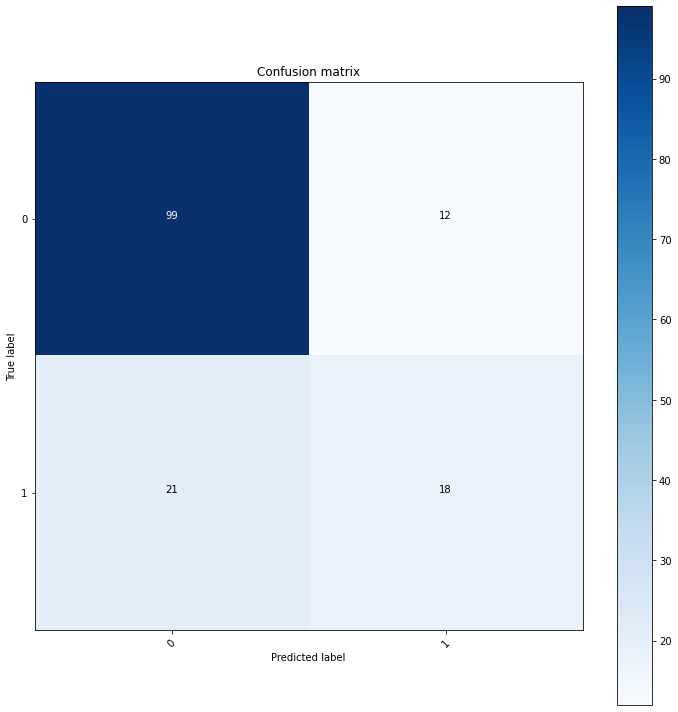

In [28]:
plot_confusion_matrix(get_metrics(train_result_strat1, 7)["CM"], classes = [0, 1], filename = "results/CM_train_strat1.png");

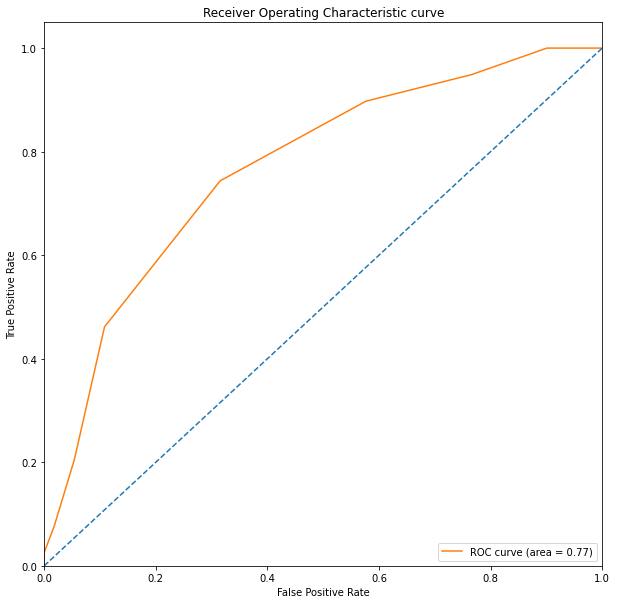

In [29]:
roc = get_metrics(train_result_strat1, 7)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat1.png");

*validation data:*

In [30]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 7, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 8, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, 6, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, 8, pretty_print = True)
)

Strategy 1:  {'ACC': 0.868421052631579, 'FPR': 0.06666666666666667, 'AUC': 0.7937500000000001, 'Ya': 0.7142857142857143, 'EF': 3.3928571428571432, 'REF': 71.42857142857143} 
Strategy 2:  {'ACC': 0.8421052631578947, 'FPR': 0.06666666666666667, 'AUC': 0.8104166666666668, 'Ya': 0.6666666666666666, 'EF': 3.1666666666666665, 'REF': 66.66666666666667} 
Strategy 3:  {'ACC': 0.7894736842105263, 'FPR': 0.1, 'AUC': 0.69375, 'Ya': 0.5, 'EF': 2.375, 'REF': 50.0} 
Strategy 4:  {'ACC': 0.7894736842105263, 'FPR': 0.06666666666666667, 'AUC': 0.6520833333333333, 'Ya': 0.5, 'EF': 2.375, 'REF': 50.0}


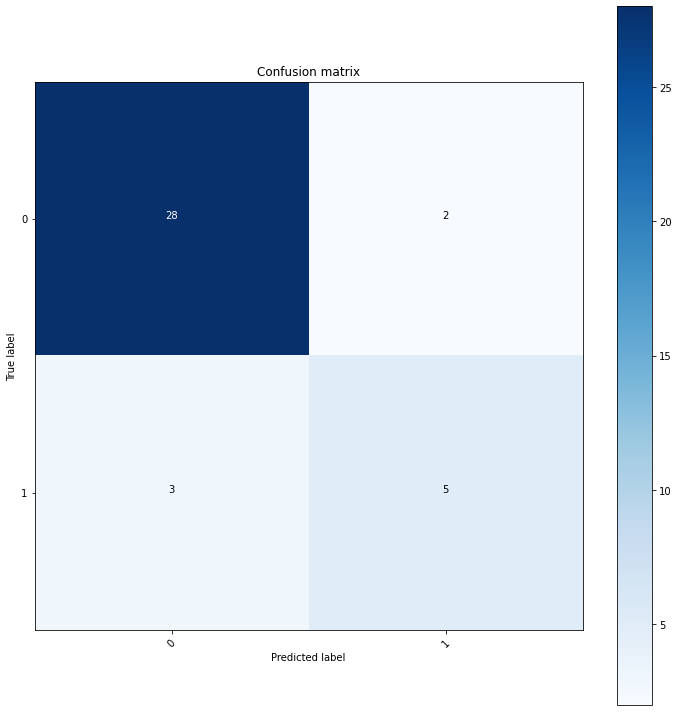

In [31]:
plot_confusion_matrix(get_metrics(val_result_strat1, 7)["CM"], classes = [0, 1], filename = "results/CM_val_strat1.png");

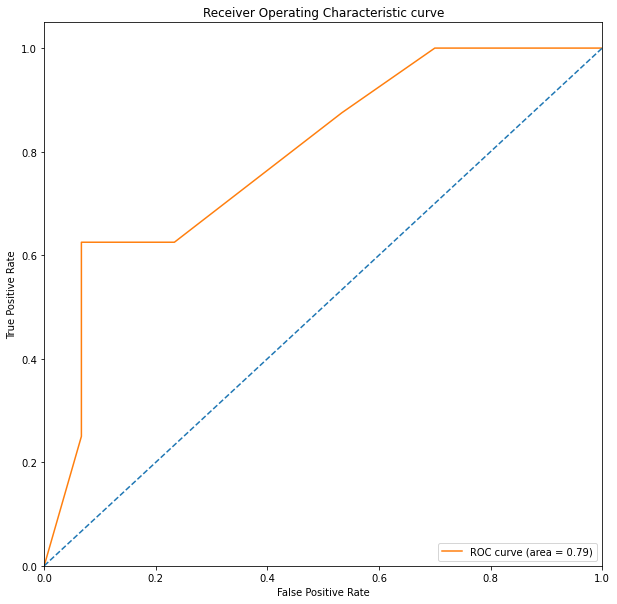

In [32]:
roc = get_metrics(val_result_strat1, 7)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat1.png");

*test data:*

In [33]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 7, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 8, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, 6, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, 8, pretty_print = True)
)

Strategy 1:  {'ACC': 0.7708333333333334, 'FPR': 0.16216216216216217, 'AUC': 0.8144963144963144, 'Ya': 0.5, 'EF': 2.181818181818182, 'REF': 54.54545454545455} 
Strategy 2:  {'ACC': 0.8333333333333334, 'FPR': 0.08108108108108109, 'AUC': 0.773955773955774, 'Ya': 0.6666666666666666, 'EF': 2.909090909090909, 'REF': 66.66666666666667} 
Strategy 3:  {'ACC': 0.7708333333333334, 'FPR': 0.16216216216216217, 'AUC': 0.7923832923832924, 'Ya': 0.5, 'EF': 2.181818181818182, 'REF': 54.54545454545455} 
Strategy 4:  {'ACC': 0.8125, 'FPR': 0.08108108108108109, 'AUC': 0.7837837837837837, 'Ya': 0.625, 'EF': 2.7272727272727275, 'REF': 62.5}


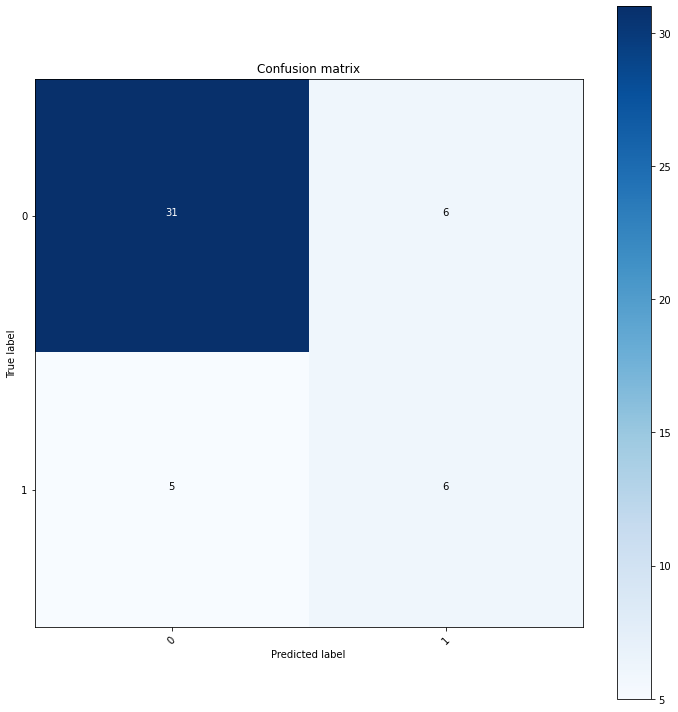

In [34]:
plot_confusion_matrix(get_metrics(test_result_strat1, 7)["CM"], classes = [0, 1], filename = "results/CM_test_strat1.png");

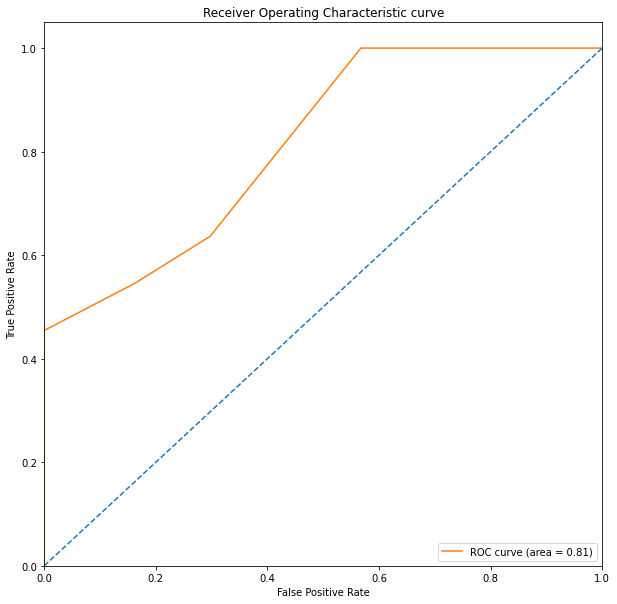

In [35]:
roc = get_metrics(test_result_strat1, 7)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat1.png");

#### **Clean up:**

In [36]:
os.remove("scoring.py")